# Movie Franchise Analysis
Questions to answer:
1. How many movies should there be per franchise?
2. When do you stop adding to a franchise?
3. Do non-numbered sequels perform better than numbered sequels?
4. How long to wait before you reboot?

In [1]:
from imdb import IMDb
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from bs4 import BeautifulSoup as bs
from datetime import datetime

In [2]:
movie_data=pd.read_csv('final_movie_dataset.csv')
movie_data=movie_data.drop('Unnamed: 0',axis=1)

In [3]:
#per screen numbers
movie_data['Gross per Screen']=movie_data['Gross']/movie_data['Theatre']
movie_data['Opening per Screen']=movie_data['Opening']/movie_data['Opening Theatre']
for i in movie_data.index.values:
    if movie_data.loc[i,'Opening Theatre'] == 0:
        movie_data.loc[i,'Opening per Screen']=movie_data.loc[i,'Opening']
    if movie_data.loc[i,'Theatre'] == 0:
        movie_data.loc[i,'Gross per Screen']=movie_data.loc[i,'Gross']

In [4]:
movie_data

,Rank,Movie,Studio,Gross,Theatre,Opening,Opening Theatre,Date,Franchise,Year,Imdb Year,Imdb Rating,Meta Score,Gross per Screen,Opening per Screen
0,1,300,WB,210614939,3280,70885301,3103,3/9/07,300,2007,2006,7.7,52,64211.871646,22844.118917
1,2,300: Rise of An Empire,WB,106580051,3490,45038460,3470,3/7/14,300,2014,2014,6.2,48,30538.696562,12979.383285
2,1,Alice in Wonderland (2010),BV,334191110,3739,116101023,3728,3/5/10,Alice in Wonderland,2010,2010,6.5,53,89379.810110,31142.978273
3,2,Alice Through the Looking Glass,BV,77041381,3763,26858726,3763,5/27/16,Alice in Wonderland,2016,2016,6.2,34,20473.393835,7137.583311
4,1,Alvin and the Chipmunks: The Squeakquel,Fox,219614612,3747,48875415,3700,12/23/09,Alvin and the Chipmunks,2009,2009,4.5,41,58610.785161,13209.571622
5,2,Alvin and the Chipmunks,Fox,217326974,3499,44307417,3475,12/14/07,Alvin and the Chipmunks,2007,2007,5.2,39,62111.167191,12750.335827
6,3,Alvin and the Chipmunks: Chipwrecked,Fox,133110742,3734,23244744,3723,12/16/11,Alvin and the Chipmunks,2011,2011,4.4,24,35648.297268,6243.551974
7,4,Alvin and the Chipmunks: The Road Chip,Fox,85886987,3705,14287159,3653,12/18/15,Alvin and the Chipmunks,2015,2015,5.1,33,23181.373009,3911.075554
8,5,The Chipmunk Adventure,Gold.,6804312,916,2584720,916,5/22/87,Alvin and the Chipmunks,1987,1987,7.2,0,7428.288210,2821.746725
9,1,American Pie 2,Uni.,145103595,3157,45117985,3063,8/10/01,American Pie,2001,2001,6.4,43,45962.494457,14729.998368


## Critics vs Audience
Audience and critics views on movies are correlated

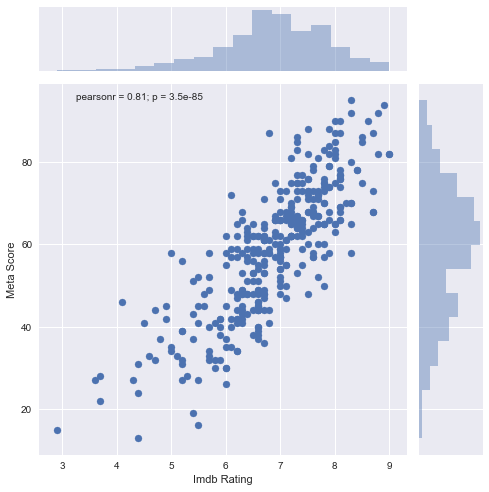

In [7]:
# imdb to metacritic
sns.set(style="darkgrid", color_codes=True)
data_rating_compare=movie_data[movie_data['Meta Score'] !=0]
g = sns.jointplot("Imdb Rating", "Meta Score", data=data_rating_compare, color="b", size=7)
plt.savefig('plots/imdb_metacritic_corr.png', bbox_inches='tight')

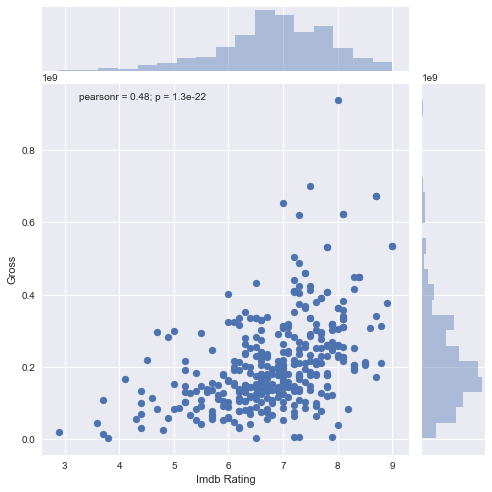

In [8]:
# imdb to total revenue
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("Imdb Rating", "Gross", data=movie_data, color="b", size=7)
plt.savefig('plots/imdb_gross_corr.png', bbox_inches='tight')

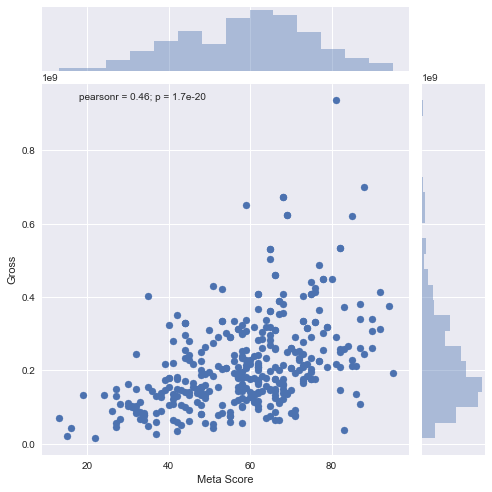

In [9]:
# metacritic to revenue
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("Meta Score",'Gross' , data=data_rating_compare, color="b", size=7)
plt.savefig('plots/metacritic_gross_corr.png', bbox_inches='tight')

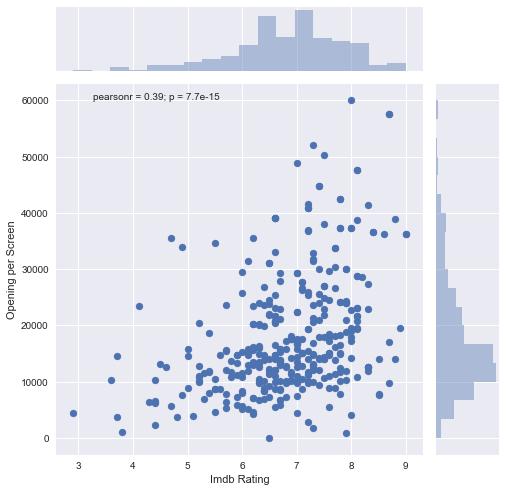

In [10]:
# imdb to revenue per screen
sns.set(style="darkgrid", color_codes=True)
clean_per_screen=movie_data.drop(movie_data['Opening Theatre']==0)
clean_per_screen=clean_per_screen[clean_per_screen['Opening per Screen']<1e5]
#clean_per_screen=clean_per_screen.drop(movie_data['Opening Theatre']==0)
g = sns.jointplot("Imdb Rating",'Opening per Screen' , data=clean_per_screen, color="b", size=7)
plt.savefig('plots/imdb_perscreen_corr.png', bbox_inches='tight')

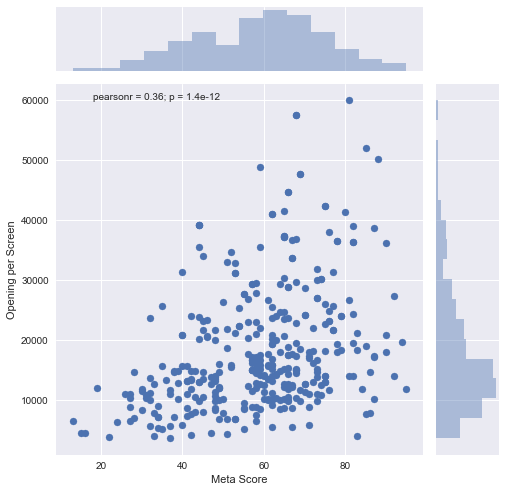

In [11]:
# imdb to revenue per screen
sns.set(style="darkgrid", color_codes=True)
meta_per_screen=clean_per_screen[clean_per_screen['Meta Score'] !=0]
g = sns.jointplot("Meta Score",'Opening per Screen' , data=meta_per_screen, color="b", size=7)
plt.savefig('plots/metacritic_percscreen_corr.png', bbox_inches='tight')

In [13]:
#unique franchise
f=movie_data.Franchise.unique()
output_columns = ['Rank', 'Movie','Studio', 'Gross', 'Theatre', 'Opening',
                  'Opening Theatre', 'Date', 'Franchise', 'Year', 'Imdb Year', 
                 'Imdb Rating', 'Meta Score', 'Gross per Screen', 'Opening per Screen','Chrono Rank']
output = dict((x, []) for x in output_columns)

df=pd.DataFrame(output)
for fran in f:
    temp=movie_data[movie_data['Franchise']==fran]
    temp=temp.sort_values('Year')
    temp['Chrono Rank']=np.arange(temp.shape[0])+1
    df=pd.concat([df,temp],ignore_index=True)

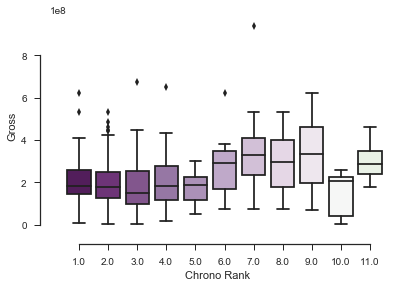

In [14]:
# sequel drop off
sns.set(style="ticks")

# Load the example tips dataset


# Draw a nested boxplot to show bills by day and sex
ax=sns.boxplot(x="Chrono Rank", y="Gross", data=df, palette="PRGn")
ax.set_xlim([-1,10.5])
sns.despine(offset=10, trim=True)
plt.savefig('plots/sequel_box.png', bbox_inches='tight')

In [102]:
df

,Chrono Rank,Date,Franchise,Gross,Gross per Screen,Imdb Rating,Imdb Year,Meta Score,Movie,Opening,Opening Theatre,Opening per Screen,Rank,Studio,Theatre,Year
0,1.0,3/9/07,300,210614939.0,64211.871646,7.7,2006.0,52.0,300,70885301.0,3103.0,22844.118917,1.0,WB,3280.0,2007.0
1,2.0,3/7/14,300,106580051.0,30538.696562,6.2,2014.0,48.0,300: Rise of An Empire,45038460.0,3470.0,12979.383285,2.0,WB,3490.0,2014.0
2,1.0,3/5/10,Alice in Wonderland,334191110.0,89379.810110,6.5,2010.0,53.0,Alice in Wonderland (2010),116101023.0,3728.0,31142.978273,1.0,BV,3739.0,2010.0
3,2.0,5/27/16,Alice in Wonderland,77041381.0,20473.393835,6.2,2016.0,34.0,Alice Through the Looking Glass,26858726.0,3763.0,7137.583311,2.0,BV,3763.0,2016.0
4,1.0,5/22/87,Alvin and the Chipmunks,6804312.0,7428.288210,7.2,1987.0,0.0,The Chipmunk Adventure,2584720.0,916.0,2821.746725,5.0,Gold.,916.0,1987.0
5,2.0,12/14/07,Alvin and the Chipmunks,217326974.0,62111.167191,5.2,2007.0,39.0,Alvin and the Chipmunks,44307417.0,3475.0,12750.335827,2.0,Fox,3499.0,2007.0
6,3.0,12/23/09,Alvin and the Chipmunks,219614612.0,58610.785161,4.5,2009.0,41.0,Alvin and the Chipmunks: The Squeakquel,48875415.0,3700.0,13209.571622,1.0,Fox,3747.0,2009.0
7,4.0,12/16/11,Alvin and the Chipmunks,133110742.0,35648.297268,4.4,2011.0,24.0,Alvin and the Chipmunks: Chipwrecked,23244744.0,3723.0,6243.551974,3.0,Fox,3734.0,2011.0
8,5.0,12/18/15,Alvin and the Chipmunks,85886987.0,23181.373009,5.1,2015.0,33.0,Alvin and the Chipmunks: The Road Chip,14287159.0,3653.0,3911.075554,4.0,Fox,3705.0,2015.0
9,1.0,7/9/99,American Pie,102561004.0,40314.860063,7.0,1999.0,58.0,American Pie,18709680.0,2508.0,7460.000000,3.0,Uni.,2544.0,1999.0
